In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.utils import shuffle 
import numpy as np 
from lazypredict.Supervised import LazyRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('drag_coef.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [5]:
reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None) 
  
# fitting data in Lazyregressor 
models, predictions = reg.fit(X_train, X_test, 
                              y_train, y_test) 

print(models)

100%|██████████| 42/42 [00:01<00:00, 26.79it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 579, number of used features: 2
[LightGBM] [Info] Start training from score 78.411285
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

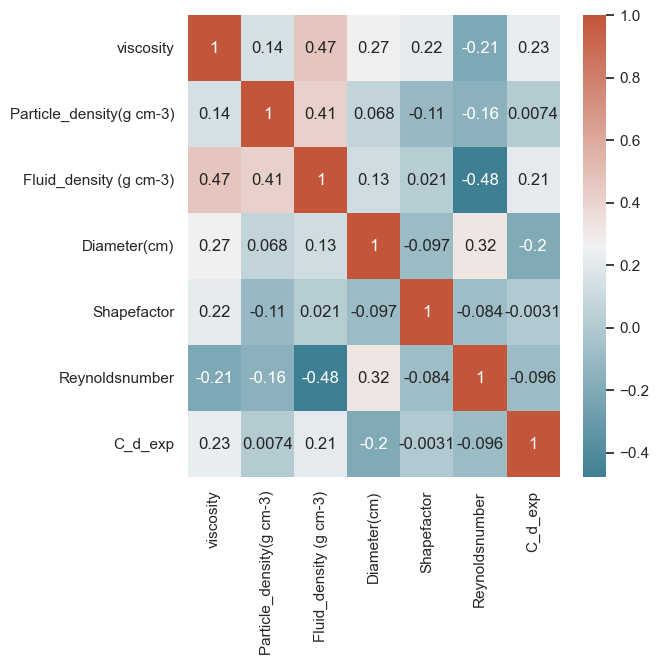

In [11]:
# the default correlation method of pandas.corr is pearson
corrmat = data.corr(method='pearson')

# To modify image size
fig, ax = plt.subplots()
fig.set_size_inches(6,6)

# customized color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# we can make a heatmap with seaborn
sns.heatmap(corrmat, cmap=cmap, annot=True)
plt.show()

In [5]:
from sklearn.feature_selection import (f_regression, SelectPercentile,)

In [6]:
univariate = f_regression(X_train, y_train)

# the output is one array with f-scores
# and one array with the pvalues

univariate

(array([3.56790514e+01, 8.06067800e-03, 2.69851622e+01, 2.26045373e+01,
        8.74506189e-02, 5.64658556e+00]),
 array([4.07082769e-09, 9.28492181e-01, 2.84760964e-07, 2.51650738e-06,
        7.67549925e-01, 1.78147777e-02]))

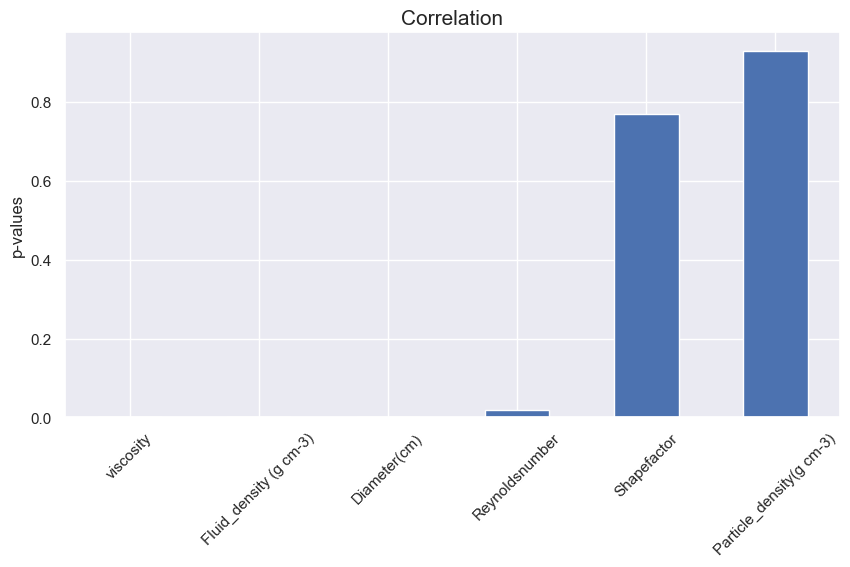

In [7]:
# 1)capture the pvalues in a pandas series
# 2)add the variable names in the index
# 3)sort the features based on their anova pvalues
# 4)and make a var plot

plt.rc('axes', titlesize=15) #fontsize of the title
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(10, 5), rot=45)
plt.ylabel('p-values')
plt.title('Correlation')
plt.show()

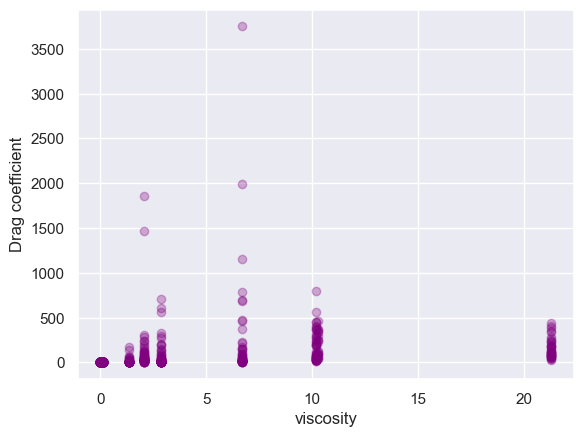

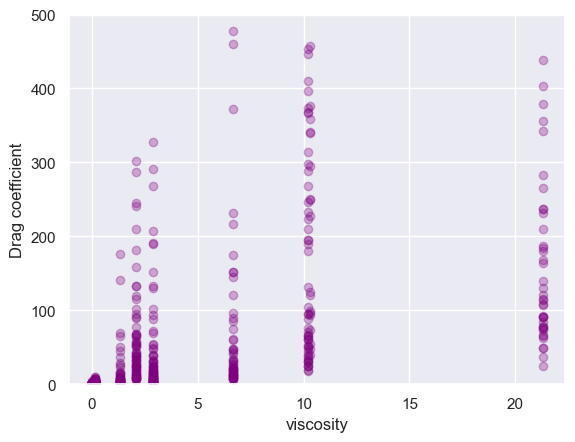

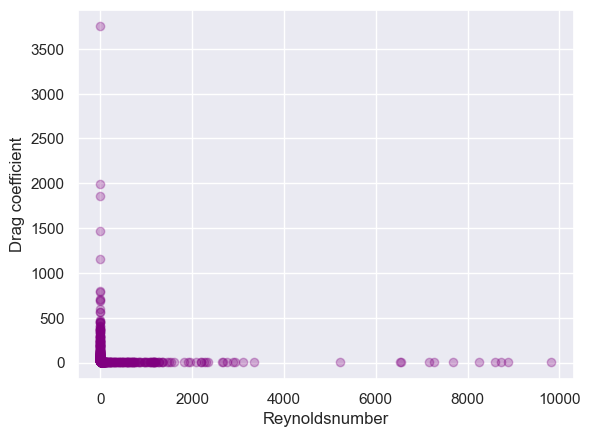

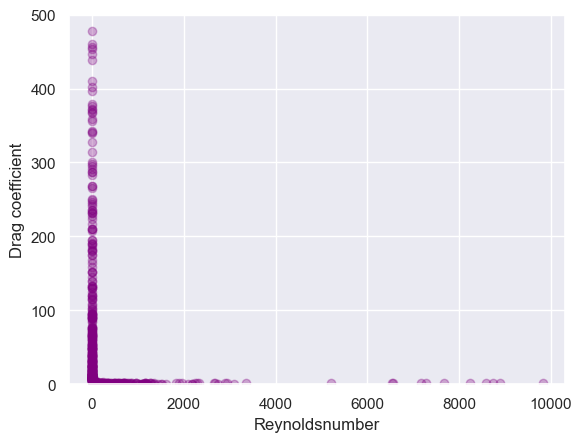

In [8]:
# variable with small p-value
plt.scatter(X_train["viscosity"], y_train, alpha=0.3, color="purple")
plt.xlabel('viscosity')
plt.ylabel('Drag coefficient')
plt.show()

plt.scatter(X_train["viscosity"], y_train, alpha=0.3, color="purple")
plt.ylim(0, 500)
plt.xlabel('viscosity')
plt.ylabel('Drag coefficient')
plt.show()

plt.scatter(X_train["Reynoldsnumber"], y_train, alpha=0.3, color="purple")
plt.xlabel('Reynoldsnumber')
plt.ylabel('Drag coefficient')
plt.show()

plt.scatter(X_train["Reynoldsnumber"], y_train, alpha=0.3, color="purple")
plt.ylim(0, 500)
plt.xlabel('Reynoldsnumber')
plt.ylabel('Drag coefficient')
plt.show()

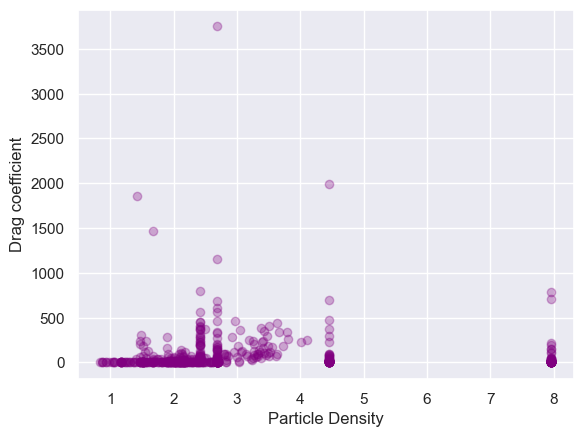

In [9]:
# variable with bigger p-value

plt.scatter(X_train["Particle_density(g cm-3)"], y_train, alpha=0.3, color="purple")
plt.xlabel('Particle Density')
plt.ylabel('Drag coefficient')
plt.show()

In [10]:
sel = SelectPercentile(f_regression, percentile=30).fit(X_train, y_train)

# Display selected feature names

sel.get_feature_names_out()

array(['viscosity', 'Fluid_density (g cm-3)'], dtype=object)